In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/DELL/Downloads/IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
df = df.iloc[:2500]

**DATA CLEANING**


***Deleting duplicates***

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop_duplicates()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
2495,Another great movie by Costa-Gavras. It's a gr...,negative
2496,Though structured totally different from the b...,positive
2497,Handsome and dashing British airline pilot Geo...,positive
2498,This film breeches the fine line between satir...,negative


***Converting to lowercase***

In [8]:
df['review'] = df['review'].str.lower()

In [9]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


***Removing whitespaces***

In [10]:
df['review'] = df['review'].str.strip()

In [11]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


***Removing HTML tags***

In [12]:
df['review'] = df['review'].str.replace(r'<.*?>' , '' , regex = True)

In [13]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


***Removing URL***

In [14]:
#checking if a review contains URL
df[df['review'].str.contains(r'https?://\S+|www\.\S+')]

,review,sentiment
742,mario lewis of the competitive enterprise inst...,negative
907,following directly from where the story left o...,positive
1088,this quasi j-horror film followed a young woma...,negative
1137,i really think i should make my case and have ...,positive
1141,this show has to be my favorite out of all the...,positive
1972,the basic plot of 'marigold' boasts of a roman...,negative
2132,"i, too, found ""oppenheimer"" to be a brilliant ...",positive


In [15]:
df['review'] = df['review'].str.replace(r'https?://\S+|www\.\S+' , '', regex = True)

In [16]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


***Expanding abbrevaiations***

In [17]:
import re
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

df['review'] = df['review'].apply(remove_abb)



In [18]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


***Removing punctuations***

In [19]:
import string

string.punctuation
def remove_punctuations(data):
    for i in string.punctuation:
        if i in data:
            data = data.replace(i,'')
    return data

df['review'] = df['review'].apply(remove_punctuations)

In [20]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter matteis love in the time of money is a ...,positive


**PREPROCESSING**

***Tokenization***

In [21]:
import nltk

In [23]:
from nltk.tokenize import word_tokenize

df['tokenized review'] = df['review'].apply(word_tokenize)

In [24]:
df.head()

,review,sentiment,tokenized review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


***Stop Word Removal***

In [79]:
from nltk.corpus import stopwords

L = []
def remove_stopwords(data):
    for word in data:
        if word not in stopwords.words('english'):
            L.append(word)
    return L

df['tokenized review'] = df['tokenized review'].apply(remove_stopwords)

In [80]:
df.head()

,review,sentiment,tokenized review
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
2,i thought this was a wonderful way to spend ti...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
3,basically there is a family where a little boy...,negative,"[one, reviewers, mentioned, watching, 1, oz, e..."
4,petter matteis love in the time of money is a ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."


In [ ]:
df['review'] = df["tokenized review"].apply(lambda x: " ".join(x))

**EDA AND FEATURE ENGINEERING**

***Finding character length***

In [47]:
df['char length'] = df['review'].str.len()

***Finding word***

In [48]:
df['word length'] = df['tokenized review'].apply(len)

In [49]:
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_7748\2174114097.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment'] == 'positive']['char length'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7748\2174114097.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment'] == 'n

<Axes: xlabel='char length', ylabel='Density'>

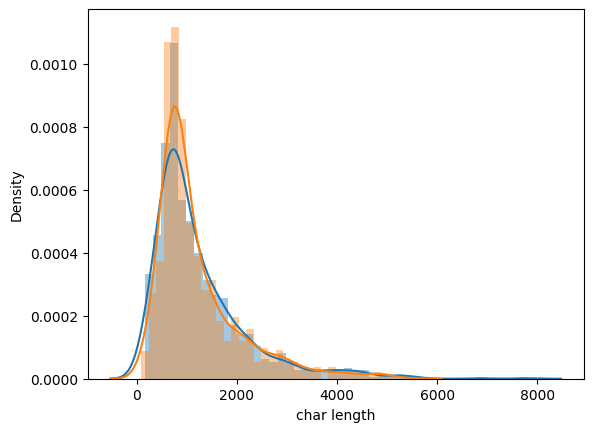

In [52]:
#pdf of character length of reviews having a positive sentiment

sns.distplot(df[df['sentiment'] == 'positive']['char length'])

#pdf of character length of reviews having a negative sentiment

sns.distplot(df[df['sentiment'] == 'negative']['char length'])

***Extracting Bigrams***

In [ ]:
from nltk import ngrams

pd.Series(ngrams(df['tokenized review'].sum(),2)).value_counts()

***Word Cloud***

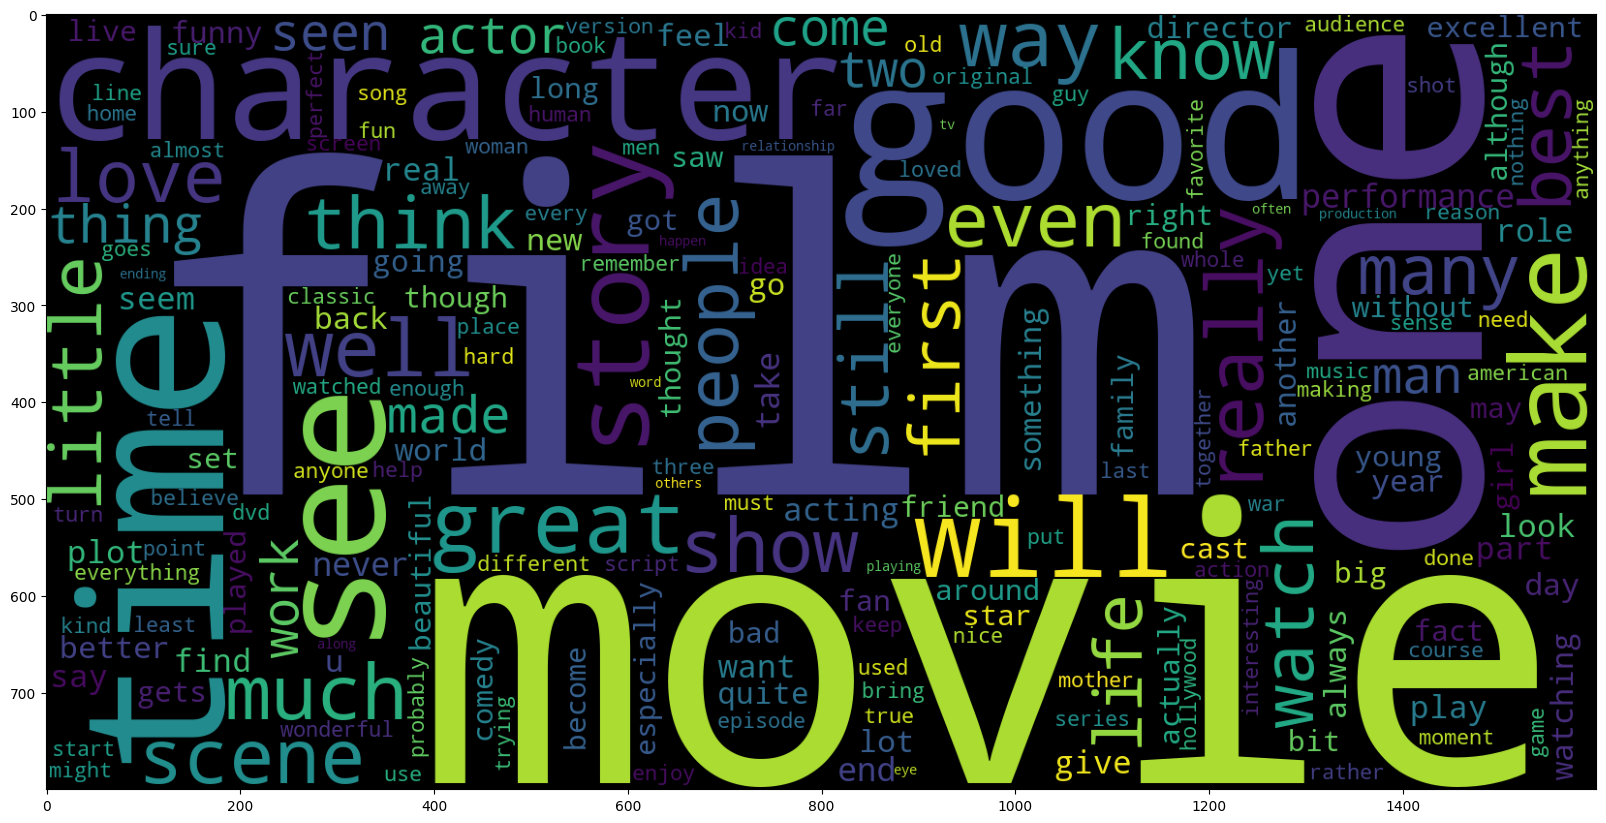

In [28]:
#for positive sentiment
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600, height = 800).generate(" ".join(df[df["sentiment" ] == 'positive']['review']))
plt.imshow(wc)

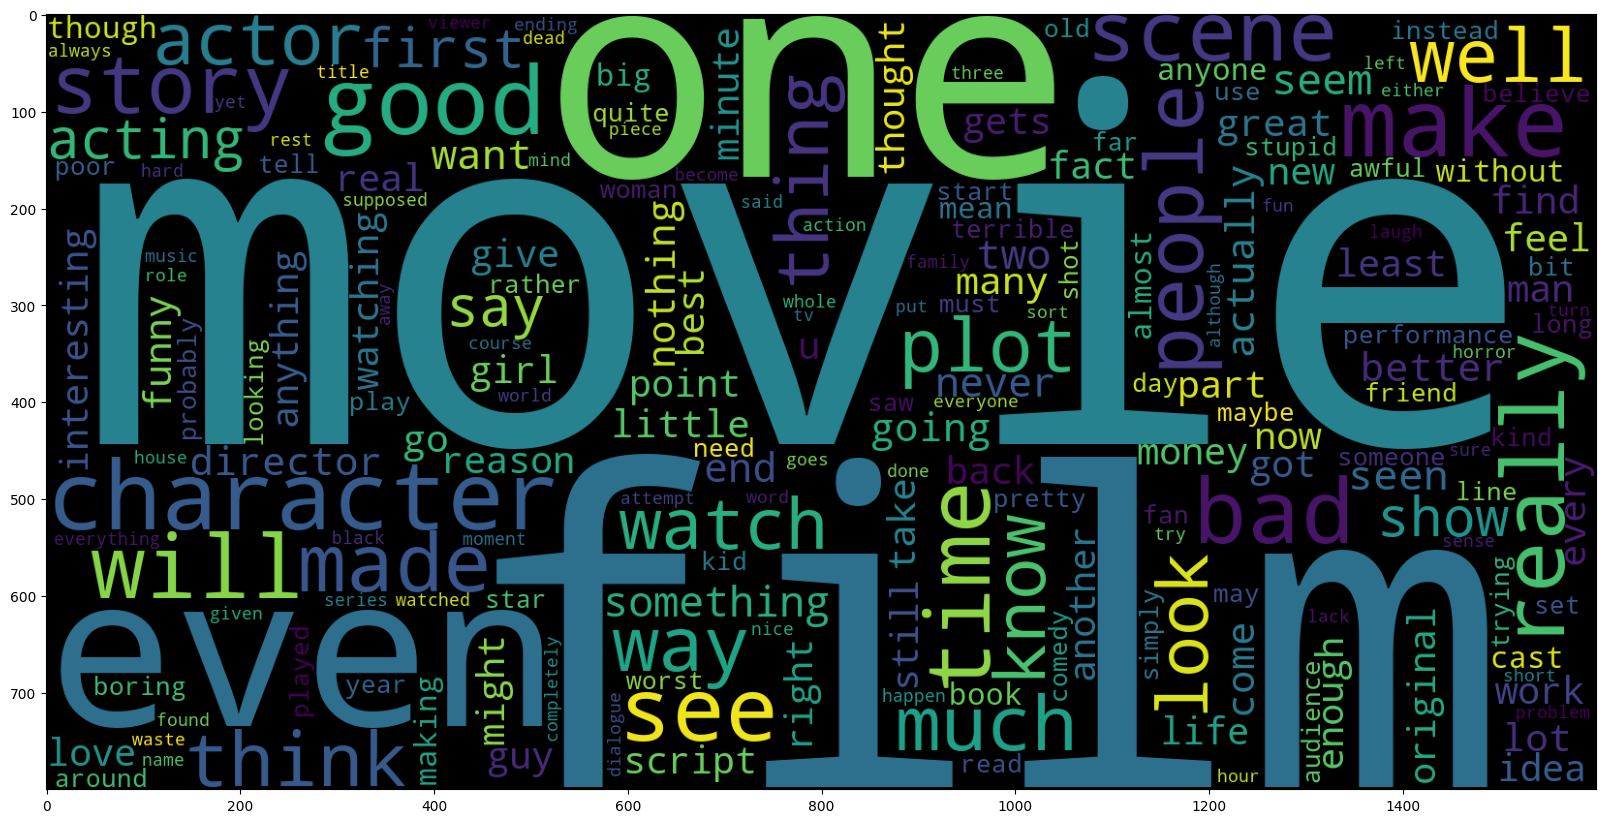

In [29]:
#for negative sentiment
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600, height = 800).generate(" ".join(df[df["sentiment" ] == 'negative']['review']))
plt.imshow(wc)

**VECTORIZATION**

***Bag of words***

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features = 5000)   #most important top 5000 words in the review
bag_of_words = count_vectorizer.fit_transform(df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())

In [45]:
bag_of_words

,10,100,1010,11,110,12,13,13th,14,15,...,young,younger,your,yourself,youth,zero,zoey,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2498,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


**PRINCIPAL COMPONENT ANALYSIS**

*converts high dimensional data to lower dimensional data*

In [53]:
 from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
results = pca.fit_transform(bag_of_words.values)

In [54]:
results.shape

(2500, 2)

<Axes: >

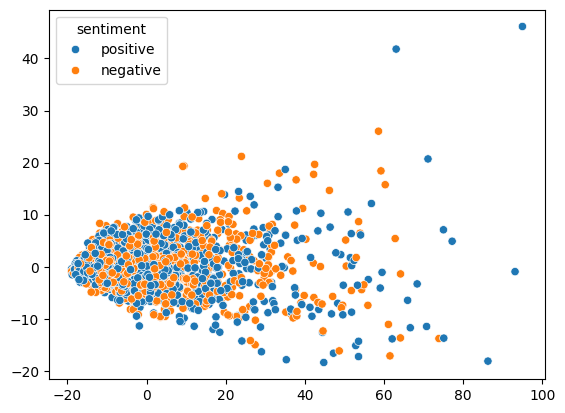

In [56]:
sns.scatterplot(x = results[:,0], y = results[:,1] , hue = df['sentiment'])

                                                                        ***THE END***